<a href="https://colab.research.google.com/github/badrishdavey/datascience_lab/blob/master/Session_10_Feature_Engineering_to_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
from bs4 import BeautifulSoup, SoupStrainer
import bs4
import csv

search_link = "https://www.census.gov/programs-surveys/popest.html"
r = requests.get(search_link)
raw_html = r.text
soup = BeautifulSoup(raw_html, 'html.parser')
all_links = soup.find_all("a")
MySet = set()

for link in all_links:
  hrefs = str(link.get("href"))
  if hrefs.startswith('http'):
    MySet.add(hrefs)
  elif hrefs.startswith('/'):
    MySet.add('https://www.census.gov' + hrefs)
  elif hrefs.startswith('#'):
    MySet.add('{}{}'.format(search_link, hrefs))

# MyList = []
# for x in MySet:
#   MyList.append(x)
  
# MyList = [x for x in MySet]

MyList = list(MySet)

print(MyList)
print("Number of URLS BEFORE processing: ")
print(len(all_links))
print("Number of URLS AFTER processing: ")
print(len(MyList))

['https://www.census.gov/topics/international-trade.html', 'https://www.census.gov/topics/population/population-estimates.html', 'https://www.census.gov/careers', 'https://www.census.gov/about/policies.html', 'https://www.census.gov/datalinkage', 'https://www.usa.gov/', 'https://www.census.gov/programs-surveys/popest/data/tables.html', 'https://www.census.gov/programs-surveys/surveys-programs.html', 'https://www.facebook.com/uscensusbureau/', 'https://www.census.gov/academy', 'https://www.census.gov/topics/employment.html', 'https://www.census.gov/programs-surveys/asm.html', 'https://www.census.gov/topics/research.html', 'https://www.census.gov/topics/public-sector/voting.html', 'https://www.census.gov/library/visualizations/2019/comm/15-fastest-growing-cities.html', 'https://www.census.gov/programs-surveys/popest/guidance.html', 'https://www.census.gov/topics/preparedness.html', 'https://www.census.gov/topics/housing.html', 'https://www.census.gov/AmericaCounts', 'https://www.census.g

# House Prices: Advanced Regression Techniques

[Kaggle Competition Link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

Task: Predict sales prices of houses (residential properties) in Ames, Iowa, USA.

Factors involved in pricing of the house:

- Economic growth
- Demographics
  - 
- Interest Rates
- Location
  - proximity to playgrounds
- room to move
- supply and demmand
- number of bathrooms
- parking
- home improvements
  - 
- age of house
- neighborhood
  - noise polution
  - 
- Appraisal value
- microfactors(,,,traffic volume, road quality, zoning laws, good schools, ) availability of mortgages unemployement geographical factors political property market performance aesthetics investement potential(ranting) size and design condition Infestation and Untoward Incidents(fire,pest) 

## Hypothesis

- Null Hypothesis ($H_o$) - There exists no impact of a particular feature on the dependent variable.
- Alternate Hypothesis ($H_a$) - There exists a direct impact of a particular feature on the dependent variable.

Desicion criteria 5% significance level. Default is that $H_o$ is true. If our p value is $< 0.05$ then we will reject the Null hypothesis. If p $> 0.05$, we fail to reject the null hypothesis.

My thought process is that possible features affecting the sales price are:

1. Size of the house
2. Location of the house
3. Presence of shopping malls / schools / etc near the house
4. Parking facility
5. Lawn / garden area
6. Utilities in the house

...


## Data Collection

The dataset is already compiled and available at [Kaggle Data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). In this dataset, the following fields are available:

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet

- **Street**: Type of road access

- **Alley**: Type of alley access

- **LotShape**: General shape of property

- **LandContour**: Flatness of the property

- **Utilities**: Type of utilities available

- **LotConfig**: Lot configuration

- **LandSlope**: Slope of property

- **Neighborhood**: Physical locations within Ames city limits

- **Condition1**: Proximity to main road or railroad

- **Condition2**: Proximity to main road or railroad (if a second is present)

- **BldgType**: Type of dwelling

- **HouseStyle**: Style of dwelling

- **OverallQual**: Overall material and finish quality

- **OverallCond**: Overall condition rating

- **YearBuilt**: Original construction date

- **YearRemodAdd**: Remodel date

- **RoofStyle**: Type of roof

- **RoofMatl**: Roof material

- **Exterior1st**: Exterior covering on house

- **Exterior2nd**: Exterior covering on house (if more than one material)

- **MasVnrType**: Masonry veneer type

- **MasVnrArea**: Masonry veneer area in square feet

- **ExterQual**: Exterior material quality

- **ExterCond**: Present condition of the material on the exterior

- **Foundation**: Type of foundation

- **BsmtQual**: Height of the basement

- **BsmtCond**: General condition of the basement

- **BsmtExposure**: Walkout or garden level basement walls

- **BsmtFinType1**: Quality of basement finished area

- **BsmtFinSF1**: Type 1 finished square feet

- **BsmtFinType2**: Quality of second finished area (if present)

- **BsmtFinSF2**: Type 2 finished square feet

- **BsmtUnfSF**: Unfinished square feet of basement area

- **TotalBsmtSF**: Total square feet of basement area

- **Heating**: Type of heating

- **HeatingQC**: Heating quality and condition

- **CentralAir**: Central air conditioning

- **Electrical**: Electrical system

- **1stFlrSF**: First Floor square feet

- **2ndFlrSF**: Second floor square feet

- **LowQualFinSF**: Low quality finished square feet (all floors)

- **GrLivArea**: Above grade (ground) living area square feet

- **BsmtFullBath**: Basement full bathrooms

- **BsmtHalfBath**: Basement half bathrooms

- **FullBath**: Full bathrooms above grade

- **HalfBath**: Half baths above grade

- **Bedroom**: Number of bedrooms above basement level

- **Kitchen**: Number of kitchens

- **KitchenQual**: Kitchen quality

- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

- **Functional**: Home functionality rating

- **Fireplaces**: Number of fireplaces

- **FireplaceQu**: Fireplace quality

- **GarageType**: Garage location

- **GarageYrBlt**: Year garage was built

- **GarageFinish**: Interior finish of the garage

- **GarageCars**: Size of garage in car capacity

- **GarageArea**: Size of garage in square feet

- **GarageQual**: Garage quality

- **GarageCond**: Garage condition

- **PavedDrive**: Paved driveway

- **WoodDeckSF**: Wood deck area in square feet

- **OpenPorchSF**: Open porch area in square feet

- **EnclosedPorch**: Enclosed porch area in square feet

- **3SsnPorch**: Three season porch area in square feet

- **ScreenPorch**: Screen porch area in square feet

- **PoolArea**: Pool area in square feet

- **PoolQC**: Pool quality

- **Fence**: Fence quality

- **MiscFeature**: Miscellaneous feature not covered in other categories

- **MiscVal**: Value of miscellaneous feature

- **MoSold**: Month Sold

- **YrSold**: Year Sold

- **SaleType**: Type of sale

- **SaleCondition**: Condition of sale

## Data Exploration

- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis
- Cross Tabs

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 6.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [0]:
train=pd.read_csv("https://raw.githubusercontent.com/Shitao/Kaggle-House-Prices-Advanced-Regression-Techniques/master/input/train.csv")
test=pd.read_csv("https://raw.githubusercontent.com/Shitao/Kaggle-House-Prices-Advanced-Regression-Techniques/master/input/test.csv")

In [0]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
print('Train data has {} rows and {} columns'.format(*train.shape))  # train.shape[0], train.shape[1] # * is unpacking the list resulted from train.shape
print('Test data has {} rows and {} columns'.format(*test.shape))

Train data has 1460 rows and 81 columns
Test data has 1459 rows and 80 columns


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### Univariate Analysis

##### Identifying columns with missing values

In [0]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

##### Identifying the number of missing values

In [0]:
miss = train.isnull().sum()/len(train) * 100
miss = miss[miss > 0]
miss.sort_values(inplace=True)
# miss = miss.sort_values(inplace=False)
miss

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [0]:
miss = miss.to_frame()
# miss

In [0]:
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index
miss

,count,Name
Name,,
Electrical,0.068493,Electrical
MasVnrType,0.547945,MasVnrType
MasVnrArea,0.547945,MasVnrArea
BsmtQual,2.534247,BsmtQual
BsmtCond,2.534247,BsmtCond
BsmtFinType1,2.534247,BsmtFinType1
BsmtExposure,2.602740,BsmtExposure
BsmtFinType2,2.602740,BsmtFinType2
GarageCond,5.547945,GarageCond


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


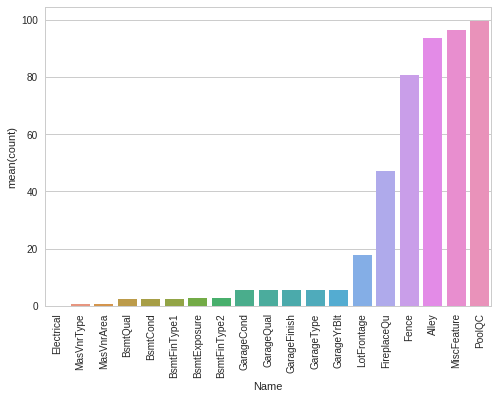

In [0]:
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()

##### Dependant Variable

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


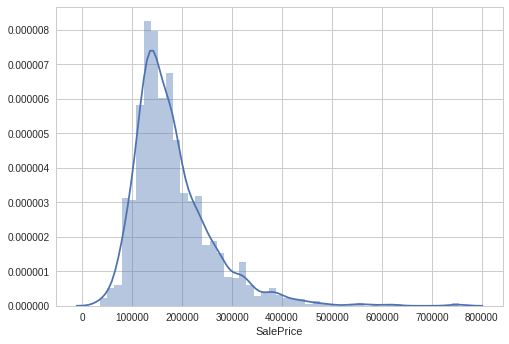

In [0]:
sns.distplot(train['SalePrice'])
plt.show()

Since this is right-skewed, we will do a log transform in hope that the result becomes more normalised. (If it were left skewed, we could do exponent)

In [0]:
print('Skewness of the SalesPrice is {}'.format(train['SalePrice'].skew()))

Skewness of the SalesPrice is 1.8828757597682129


Skewness is 0.12133506220520406


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


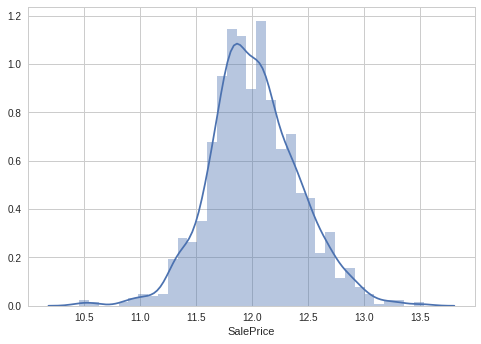

In [0]:
target = np.log(train['SalePrice'])
print('Skewness is {}'.format(target.skew()))
sns.distplot(target)
plt.show()

In [0]:
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 38 numeric and 43 categorical columns in train data


In [0]:
numeric_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


In [0]:
del numeric_data['Id']

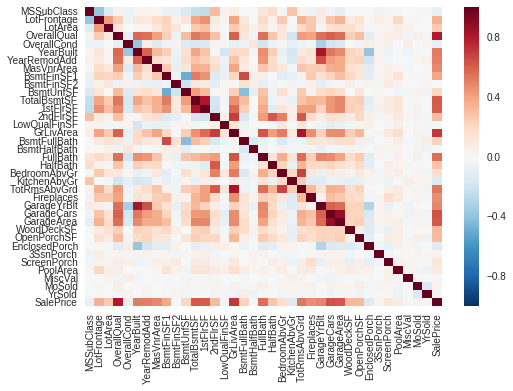

In [0]:
corr = numeric_data.corr()  # Correlation is for numeric data only
sns.heatmap(corr)
plt.show()
# corr

In [0]:
print (corr['SalePrice'].sort_values(ascending=False)[:15]) #top 15 values
print ('----------------------')
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) #last 5 values

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64
----------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


We like correlation values close to + or - 1 but not close to 0

Let us observe the most highly correlated column: OverallQual

In [0]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [0]:
pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=[np.median, np.mean, np.min, np.max])  # we are using median and not mean because median works well with outliers
# pivot = train[['OverallQual', 'SalePrice']].groupby('OverallQual').median()
# pivot.sort_values(by='SalePrice')
pivot

,median,mean,amin,amax
,SalePrice,SalePrice,SalePrice,SalePrice
OverallQual,,,,
1,50150,50150.000000,39300,61000
2,60000,51770.333333,35311,60000
3,86250,87473.750000,37900,139600
4,108000,108420.655172,34900,256000
5,133000,133523.347607,55993,228950
6,160000,161603.034759,76000,277000
7,200141,207716.423197,82500,383970
8,269750,274735.535714,122000,538000


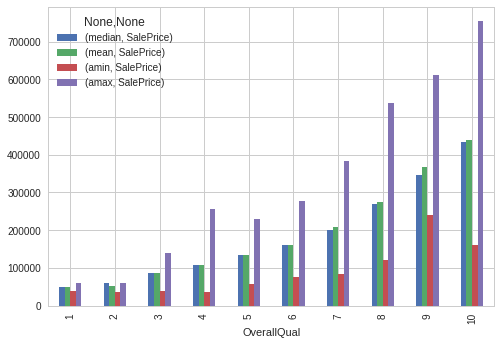

In [0]:
pivot.plot(kind='bar')
plt.show()

Lets look at the next highest corellated column: GrLivArea

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


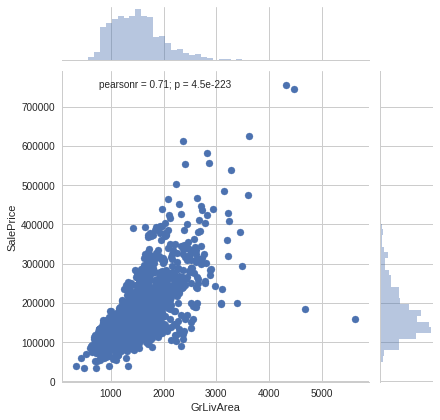

In [0]:
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.show()

In [0]:
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [0]:
sp_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
sp_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


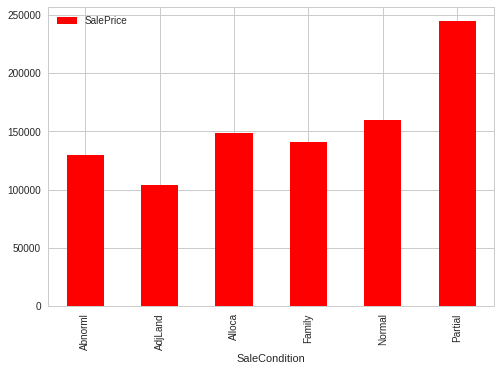

In [0]:
sp_pivot.plot(kind='bar',color='red')
plt.show()

In order to identify which categorical variables are *correlated* with our target variables.

Here, our hypotheses are:

- $H_o$ - There exists no significant difference between the groups
- $H_a$ - There exists a significant difference between the groups

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2923: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


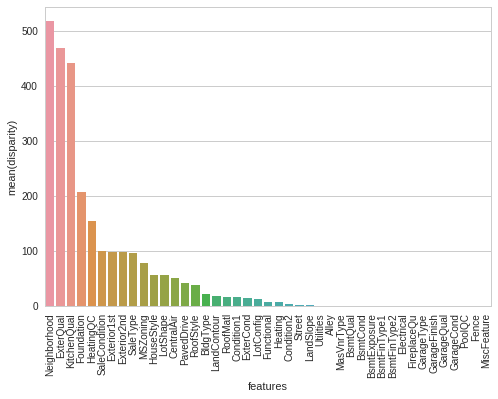

In [0]:
cat = [f for f in train.columns if train.dtypes[f] == 'object']

def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat  # List of all columns
    pvals = []
    for c in cat:  # Select a column
        samples = []
        for cls in frame[c].unique():  # Select a value in the column. Unique is telling which are the different values
            s = frame[frame[c] == cls]['SalePrice'].values  # SalePrice for those rows where column has value cls
                                                            # SalesPrice of those rows where the class is cls
            samples.append(s)
#         print(c, samples)
        pval = stats.f_oneway(*samples)[1]  # This is where anova is happening. [1] is for getting second value returned
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['SalePrice'] = train.SalePrice.values
k = anova(cat_data)
k['disparity'] = np.log(1./k['pval'].values)  # Lesser the p value, more the disparity
sns.barplot(data=k, x = 'features', y='disparity')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


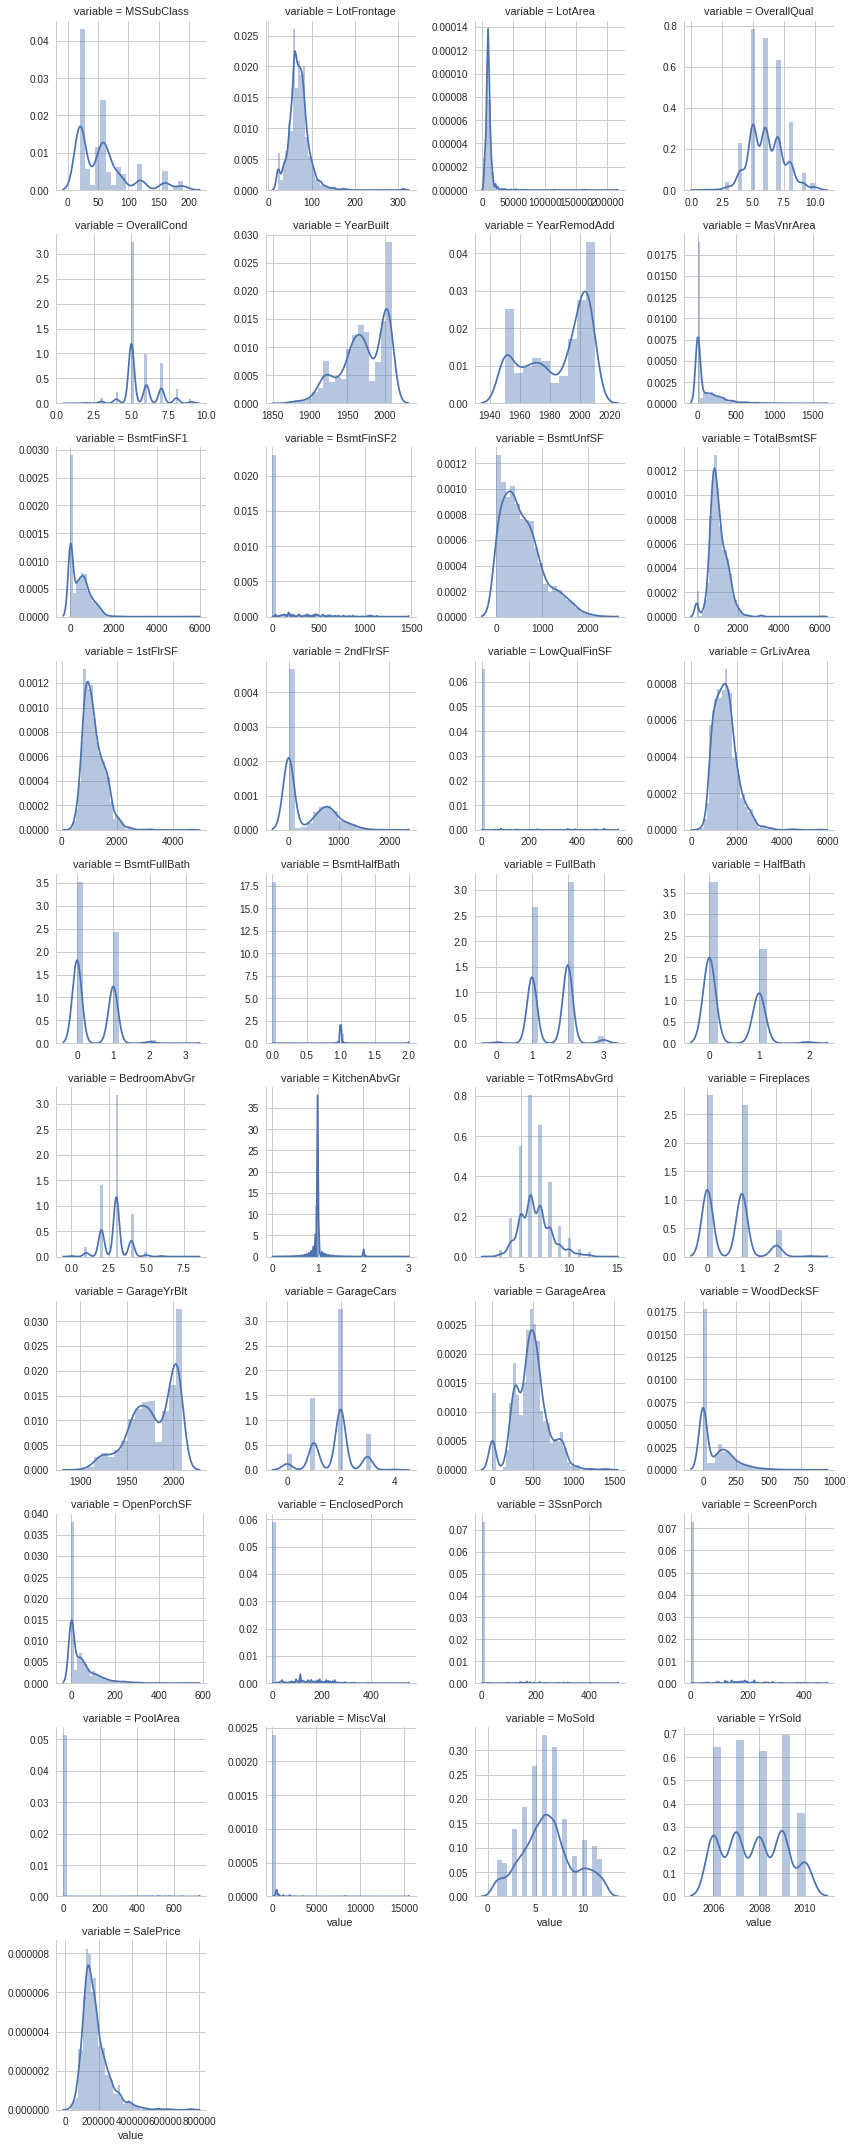

In [0]:
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)
# print(nd)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


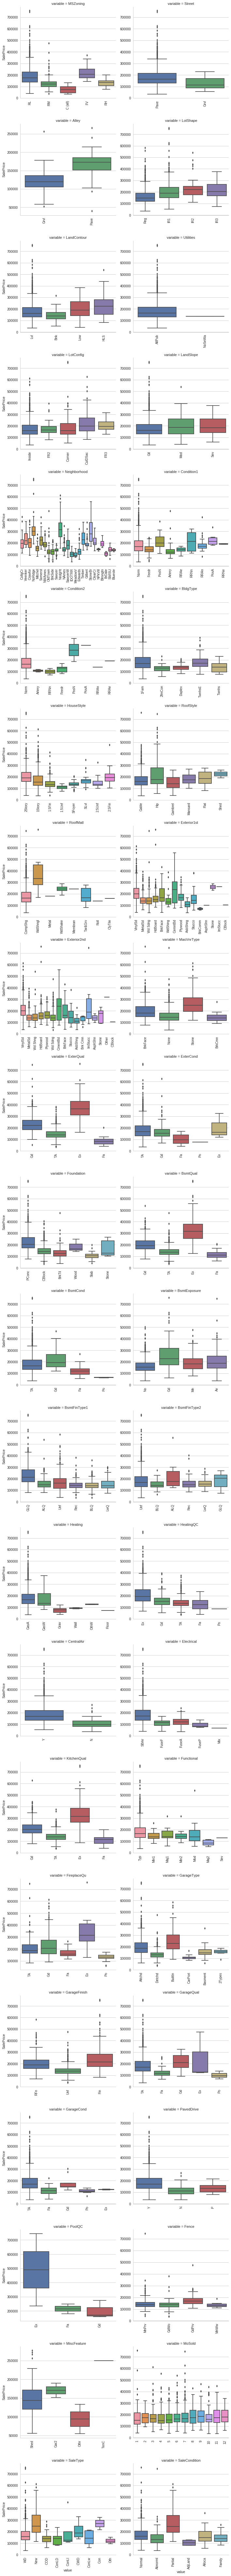

In [0]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object' or f in ['MSSubPlot', 'MoSold']]

p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')


## Data Pre-Processing

- outlier values
- encode variables
- impute missing values

In [0]:
train.drop(train[train['GrLivArea'] > 4000].index, inplace=True)
train.shape

(1456, 81)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na = None):
    if fill_na is not None:
        data[var].fillna(fill_na, inplace=True)
    le.fit(data[var])
    data[var] = le.transform(data[var])
    return data

In [0]:
alldata = train.append(test)
alldata.shape

(2915, 81)

In [0]:
alldata[alldata.LotFrontage.isnull()].head()[['LotFrontage', 'Neighborhood']]

,LotFrontage,Neighborhood
7,NaN,NWAmes
12,NaN,Sawyer
14,NaN,NAmes
16,NaN,NAmes
24,NaN,Sawyer


In [0]:
# LotFrontage is contiinuous and Neighbourhood is categorical with maximum disparity wrt SalePrice
lot_frontage_by_neighborhood = train['LotFrontage'].groupby(train['Neighborhood'])

for key, group in lot_frontage_by_neighborhood:
    idx = (alldata['Neighborhood'] == key) & (alldata['LotFrontage'].isnull())
    alldata.loc[idx, 'LotFrontage'] = group.median()

In [0]:
alldata.head(25)[['LotFrontage', 'Neighborhood']]

,LotFrontage,Neighborhood
0,65.0,CollgCr
1,80.0,Veenker
2,68.0,CollgCr
3,60.0,Crawfor
4,84.0,NoRidge
5,85.0,Mitchel
6,75.0,Somerst
7,80.0,NWAmes
8,51.0,OldTown
9,50.0,BrkSide


In [0]:
lot_frontage_by_neighborhood.median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    64.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    90.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [0]:
# For continuous
alldata["MasVnrArea"].fillna(0, inplace=True)
alldata["BsmtFinSF1"].fillna(0, inplace=True)
alldata["BsmtFinSF2"].fillna(0, inplace=True)
alldata["BsmtUnfSF"].fillna(0, inplace=True)
alldata["TotalBsmtSF"].fillna(0, inplace=True)
alldata["GarageArea"].fillna(0, inplace=True)
alldata["BsmtFullBath"].fillna(0, inplace=True)
alldata["BsmtHalfBath"].fillna(0, inplace=True)
alldata["GarageCars"].fillna(0, inplace=True)
alldata["GarageYrBlt"].fillna(0.0, inplace=True)
alldata["PoolArea"].fillna(0, inplace=True)

In [0]:
# COnverting some categorical into ordinal
qual_dict = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

for i in name:
     alldata[i] = alldata[i].map(qual_dict).astype(int)

alldata["BsmtExposure"] = alldata["BsmtExposure"].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

bsmt_fin_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
alldata["BsmtFinType1"] = alldata["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
alldata["BsmtFinType2"] = alldata["BsmtFinType2"].map(bsmt_fin_dict).astype(int)
alldata["Functional"] = alldata["Functional"].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

alldata["GarageFinish"] = alldata["GarageFinish"].map({np.nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)
alldata["Fence"] = alldata["Fence"].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

In [0]:
alldata["CentralAir"] = (alldata["CentralAir"] == "Y") * 1.0
varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])

for x in varst:
    factorize(alldata, x)

In [0]:
alldata = factorize(alldata, "MSZoning", "RL")
alldata = factorize(alldata, "Exterior1st", "Other")
alldata = factorize(alldata, "Exterior2nd", "Other")
alldata = factorize(alldata, "MasVnrType", "None")
alldata = factorize(alldata, "SaleType", "Oth")

## Feature Engineering

In [0]:
# Categorical clubbed using the box plot understanding
alldata["IsRegularLotShape"] = (alldata["LotShape"] == "Reg") * 1
alldata["IsLandLevel"] = (alldata["LandContour"] == "Lvl") * 1
alldata["IsLandSlopeGentle"] = (alldata["LandSlope"] == "Gtl") * 1
alldata["IsElectricalSBrkr"] = (alldata["Electrical"] == "SBrkr") * 1
alldata["IsGarageDetached"] = (alldata["GarageType"] == "Detchd") * 1
alldata["IsPavedDrive"] = (alldata["PavedDrive"] == "Y") * 1
alldata["HasShed"] = (alldata["MiscFeature"] == "Shed") * 1

In [0]:
alldata["Remodeled"] = (alldata["YearRemodAdd"] != alldata["YearBuilt"]) * 1
alldata["RecentRemodel"] = (alldata["YearRemodAdd"] == alldata["YrSold"]) * 1
alldata["VeryNewHouse"] = (alldata["YearBuilt"] == alldata["YrSold"]) * 1

In [0]:
# Continuous with 0 as default (or a 2 peak system)
alldata["Has2ndFloor"] = (alldata["2ndFlrSF"] == 0) * 1
alldata["HasMasVnr"] = (alldata["MasVnrArea"] == 0) * 1
alldata["HasWoodDeck"] = (alldata["WoodDeckSF"] == 0) * 1
alldata["HasOpenPorch"] = (alldata["OpenPorchSF"] == 0) * 1
alldata["HasEnclosedPorch"] = (alldata["EnclosedPorch"] == 0) * 1
alldata["Has3SsnPorch"] = (alldata["3SsnPorch"] == 0) * 1
alldata["HasScreenPorch"] = (alldata["ScreenPorch"] == 0) * 1

In [0]:
# From boxplot of (numeric) categorical
alldata["HighSeason"] = alldata["MoSold"].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})
alldata["NewerDwelling"] = alldata["MSSubClass"].replace({20: 1, 30: 0, 40: 0, 45: 0, 50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0, 90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})

In [0]:
alldata.shape

(2915, 100)

In [0]:
alldata2 = train.append(test)
alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

In [0]:
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})

In [0]:
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]

alldata["TotalArea"] = alldata[area_cols].sum(axis=1)
alldata["TotalArea1st2nd"] = alldata["1stFlrSF"] + alldata["2ndFlrSF"]
alldata["Age"] = alldata["YrSold"] - alldata["YearBuilt"]
alldata["TimeSinceSold"] = 2010 - alldata["YrSold"]
alldata["SeasonSold"] = alldata["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
alldata["YearsSinceRemodel"] = alldata["YrSold"] - alldata["YearRemodAdd"]
# Budhijeev 2 over

In [0]:
alldata["SimplOverallQual"] = alldata.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplOverallCond"] = alldata.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplPoolQC"] = alldata.PoolQC.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2})
alldata["SimplGarageCond"] = alldata.GarageCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplGarageQual"] = alldata.GarageQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFunctional"] = alldata.Functional.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
alldata["SimplKitchenQual"] = alldata.KitchenQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplHeatingQC"] = alldata.HeatingQC.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtFinType1"] = alldata.BsmtFinType1.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtFinType2"] = alldata.BsmtFinType2.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtCond"] = alldata.BsmtCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtQual"] = alldata.BsmtQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterCond"] = alldata.ExterCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterQual"] = alldata.ExterQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})

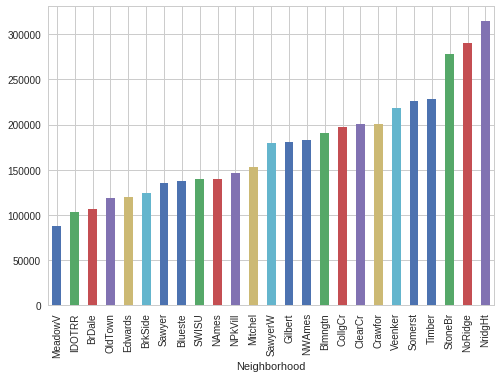

In [0]:
train['SalePrice'].groupby(train['Neighborhood']).median().sort_values().plot(kind='bar')
plt.show()  # Y is median of saleprice

In [0]:
neighborhood_map = {"MeadowV" : 0, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 1, "Edwards" : 1, "BrkSide" : 1, "Sawyer" : 1, "Blueste" : 1, "SWISU" : 2, "NAmes" : 2, "NPkVill" : 2, "Mitchel" : 2, "SawyerW" : 2, "Gilbert" : 2, "NWAmes" : 2, "Blmngtn" : 2, "CollgCr" : 2, "ClearCr" : 3, "Crawfor" : 3, "Veenker" : 3, "Somerst" : 3, "Timber" : 3, "StoneBr" : 4, "NoRidge" : 4, "NridgHt" : 4}

alldata['NeighborhoodBin'] = alldata2['Neighborhood'].map(neighborhood_map)

# Neighborhood_Good is based on news etc if the neighbourhood is considered good
alldata.loc[alldata2.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
alldata["Neighborhood_Good"].fillna(0, inplace=True)

In [0]:
alldata.shape

(2915, 126)

In [0]:
train_new = alldata[alldata['SalePrice'].notnull()]
test_new = alldata[alldata['SalePrice'].isnull()]

In [0]:
print('----------------')
print('Test', test_new.shape)

----------------
Test (1459, 126)


In [0]:
numeric_features = train_new.select_dtypes(include=[np.number]).columns.values.tolist()

In [0]:
from scipy.stats import skew
skewed = train_new[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new[skewed] = np.log1p(train_new[skewed])
test_new[skewed] = np.log1p(test_new[skewed])


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_new[numeric_features])
scaled = scaler.transform(train_new[numeric_features])

for i, col in enumerate(numeric_features):
       train_new[col] = scaled[:,i]

numeric_features.remove('SalePrice')
scaled = scaler.fit_transform(test_new[numeric_features])

# scaled is an array. We pick one column of the array at a time and put the values back in dataframe.
for i, col in enumerate(numeric_features):
      test_new[col] = scaled[:,i]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/loca

In [0]:
def onehot(onehot_df, df, column_name, fill_na=None):
    onehot_df[column_name] = df[column_name]
    if fill_na is not None:
        onehot_df[column_name].fillna(fill_na, inplace=True)

    dummies = pd.get_dummies(onehot_df[column_name], prefix="_"+column_name)
    onehot_df = onehot_df.join(dummies)
    onehot_df = onehot_df.drop([column_name], axis=1)
    return onehot_df

def munge_onehot(df):
    onehot_df = pd.DataFrame(index = df.index)
    onehot_df = onehot(onehot_df, df, "MSSubClass", None)
    onehot_df = onehot(onehot_df, df, "MSZoning", "RL")
    onehot_df = onehot(onehot_df, df, "LotConfig", None)
    onehot_df = onehot(onehot_df, df, "Neighborhood", None)
    onehot_df = onehot(onehot_df, df, "Condition1", None)
    onehot_df = onehot(onehot_df, df, "BldgType", None)
    onehot_df = onehot(onehot_df, df, "HouseStyle", None)
    onehot_df = onehot(onehot_df, df, "RoofStyle", None)
    onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd")
    onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd")
    onehot_df = onehot(onehot_df, df, "Foundation", None)
    onehot_df = onehot(onehot_df, df, "SaleType", "WD")
    onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal")

    #Fill in missing MasVnrType for rows that do have a MasVnrArea.
    temp_df = df[["MasVnrType", "MasVnrArea"]].copy()
    idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | (df["MasVnrType"].isnull()))
    temp_df.loc[idx, "MasVnrType"] = "BrkFace"
    onehot_df = onehot(onehot_df, temp_df, "MasVnrType", "None")

    onehot_df = onehot(onehot_df, df, "LotShape", None)
    onehot_df = onehot(onehot_df, df, "LandContour", None)
    onehot_df = onehot(onehot_df, df, "LandSlope", None)
    onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr")
    onehot_df = onehot(onehot_df, df, "GarageType", "None")
    onehot_df = onehot(onehot_df, df, "PavedDrive", None)
    onehot_df = onehot(onehot_df, df, "MiscFeature", "None")
    onehot_df = onehot(onehot_df, df, "Street", None)
    onehot_df = onehot(onehot_df, df, "Alley", "None")
    onehot_df = onehot(onehot_df, df, "Condition2", None)
    onehot_df = onehot(onehot_df, df, "RoofMatl", None)
    onehot_df = onehot(onehot_df, df, "Heating", None)

    # we'll have these as numerical variables too
    onehot_df = onehot(onehot_df, df, "ExterQual", "None")
    onehot_df = onehot(onehot_df, df, "ExterCond", "None")
    onehot_df = onehot(onehot_df, df, "BsmtQual", "None")
    onehot_df = onehot(onehot_df, df, "BsmtCond", "None")
    onehot_df = onehot(onehot_df, df, "HeatingQC", "None")
    onehot_df = onehot(onehot_df, df, "KitchenQual", "TA")
    onehot_df = onehot(onehot_df, df, "FireplaceQu", "None")
    onehot_df = onehot(onehot_df, df, "GarageQual", "None")
    onehot_df = onehot(onehot_df, df, "GarageCond", "None")
    onehot_df = onehot(onehot_df, df, "PoolQC", "None")
    onehot_df = onehot(onehot_df, df, "BsmtExposure", "None")
    onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None")
    onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None")
    onehot_df = onehot(onehot_df, df, "Functional", "Typ")
    onehot_df = onehot(onehot_df, df, "GarageFinish", "None")
    onehot_df = onehot(onehot_df, df, "Fence", "None")
    onehot_df = onehot(onehot_df, df, "MoSold", None)

    # Divide  the years between 1871 and 2010 into slices of 20 years
    year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20))  for i in range(0, 7))
    yearbin_df = pd.DataFrame(index = df.index)
    yearbin_df["GarageYrBltBin"] = df.GarageYrBlt.map(year_map)
    yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)
    yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
    yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)

    onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None)
    onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None)
    onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None)
    return onehot_df

#create one-hot features
onehot_df = munge_onehot(train)

# neighborhood_train = pd.DataFrame(index=train_new.shape)
# neighborhood_train['NeighborhoodBin'] = train_new['NeighborhoodBin']
# neighborhood_test = pd.DataFrame(index=test_new.shape)
# neighborhood_test['NeighborhoodBin'] = test_new['NeighborhoodBin']

# onehot_df = onehot(onehot_df, neighborhood_train, 'NeighborhoodBin', None)

In [0]:
onehot_df

,_MSSubClass_20,_MSSubClass_30,_MSSubClass_40,_MSSubClass_45,_MSSubClass_50,_MSSubClass_60,_MSSubClass_70,_MSSubClass_75,_MSSubClass_80,_MSSubClass_85,...,_YearBuiltBin_YearBin2,_YearBuiltBin_YearBin3,_YearBuiltBin_YearBin4,_YearBuiltBin_YearBin5,_YearBuiltBin_YearBin6,_YearBuiltBin_YearBin7,_YearRemodAddBin_YearBin4,_YearRemodAddBin_YearBin5,_YearRemodAddBin_YearBin6,_YearRemodAddBin_YearBin7
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [0]:
train_new = train_new.join(onehot_df) 
train_new.shape

(1456, 432)

In [0]:
onehot_df_te = munge_onehot(test)
# onehot_df_te = onehot(onehot_df_te, neighborhood_test, "NeighborhoodBin", None)
test_new = test_new.join(onehot_df_te)
test_new.shape

(1459, 417)

In [0]:
drop_cols = ["_Exterior1st_ImStucc", "_Exterior1st_Stone","_Exterior2nd_Other","_HouseStyle_2.5Fin","_RoofMatl_Membran", "_RoofMatl_Metal", "_RoofMatl_Roll", "_Condition2_RRAe", "_Condition2_RRAn", "_Condition2_RRNn", "_Heating_Floor", "_Heating_OthW", "_Electrical_Mix", "_MiscFeature_TenC", "_GarageQual_Ex",  "_PoolQC_Fa"]
train_new.drop(drop_cols, axis=1, inplace=True)
train_new.shape

(1456, 416)

In [0]:
pd.DataFrame({
    'Val': ['0', '1', '3', '5', '2', '6']
})

,Val
0,0
1,1
2,3
3,5
4,2
5,6


In [0]:
pd.get_dummies(pd.DataFrame({
    'Val': ['0', '1', '3', '5', '2', '6']
}))

,Val_0,Val_1,Val_2,Val_3,Val_5,Val_6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
5,0,0,0,0,0,1


In [0]:
pd.get_dummies(pd.DataFrame({
    'Val': ['0', '1', '3', '5', '2', '6']
})).drop('Val_6', axis=1)

,Val_0,Val_1,Val_2,Val_3,Val_5
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,1,0,0
5,0,0,0,0,0


In [0]:
test_new.drop(["_MSSubClass_150"], axis=1, inplace=True)

In [0]:
drop_cols = ["_Condition2_PosN", # only two are not zero
         "_MSZoning_C (all)",
         "_MSSubClass_160"]

train_new.drop(drop_cols, axis=1, inplace=True)
test_new.drop(drop_cols, axis=1, inplace=True)

In [0]:
train_new.shape

(1456, 413)

## Transformation Classes

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
from scipy.stats import skew

In [0]:
data = [np.random.poisson(i, 1000) for i in range(5)] + \
       [100 - np.random.poisson(i, 1000) for i in range(5)] + \
       [np.random.choice([np.nan, 1, 2, 3, 4, 5, 6], 1000)] + \
       [np.random.choice([np.nan, 1, 2, 3, 4, 5, 6], 1000, p=[0.7, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])]
data = np.array(data).T
data = pd.DataFrame(data, columns=['Feature_{:02d}'.format(i)
                                   for i in range(data.shape[1])])
data

,Feature_00,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Feature_07,Feature_08,Feature_09,Feature_10,Feature_11
0,0.0,1.0,1.0,4.0,5.0,100.0,100.0,100.0,99.0,97.0,5.0,NaN
1,0.0,1.0,3.0,2.0,3.0,100.0,100.0,96.0,100.0,99.0,4.0,NaN
2,0.0,3.0,0.0,2.0,2.0,100.0,99.0,95.0,95.0,98.0,3.0,6.0
3,0.0,0.0,0.0,2.0,3.0,100.0,100.0,98.0,98.0,93.0,2.0,NaN
4,0.0,0.0,0.0,1.0,1.0,100.0,98.0,98.0,97.0,96.0,2.0,3.0
5,0.0,0.0,3.0,3.0,2.0,100.0,100.0,99.0,98.0,98.0,1.0,NaN
6,0.0,1.0,1.0,6.0,7.0,100.0,100.0,95.0,97.0,98.0,2.0,NaN
7,0.0,1.0,3.0,5.0,3.0,100.0,98.0,98.0,96.0,97.0,2.0,NaN
8,0.0,0.0,2.0,3.0,2.0,100.0,100.0,98.0,95.0,98.0,1.0,NaN
9,0.0,1.0,3.0,2.0,4.0,100.0,100.0,97.0,98.0,94.0,3.0,NaN


In [0]:
for col in data.columns:
  print(col, skew(data[col]))

Feature_00 0.0
Feature_01 1.1336381987933952
Feature_02 0.6589164596364262
Feature_03 0.4761843530286437
Feature_04 0.5114648226418239
Feature_05 0.0
Feature_06 -1.2183839603819715
Feature_07 -0.6609981188804036
Feature_08 -0.582368096614736
Feature_09 -0.4466589112636422
Feature_10 nan
Feature_11 nan


### The Skewness Class

Any column with  > x skewness gets transformed by log (log1p)

In [0]:
class SkewnessOptimizer(BaseEstimator, TransformerMixin):
  
  def __init__(self, skew_threshold_log=0.75, skew_threshold_exp=-0.75):
    self.columns_to_log = []
    self.skew_threshold_log = skew_threshold_log
    self.columns_to_exp = []
    self.skew_threshold_exp = skew_threshold_exp

  def fit(self, X, y=None):
    if isinstance(X, pd.DataFrame):
      X = X.values
    else:
      X = X.copy()
    self.columns_to_log = []
    self.columns_to_exp = []
    for col in range(X.shape[1]):
      if skew(X[:, col]) > self.skew_threshold_log:
        self.columns_to_log.append(col)
      if skew(X[:, col]) < self.skew_threshold_exp:
        self.columns_to_exp.append(col)
    print('Columns to Log are: {}'.format(self.columns_to_log))
    print('Columns to Exponentiate are: {}'.format(self.columns_to_exp))
    return(self)

  def transform(self, X):
    if isinstance(X, pd.DataFrame):
      is_pd = True
      cols = X.columns.values
      X = X.values
    else:
      X = X.copy()
      is_pd = False
    for col in self.columns_to_log:
      X[:, col] = np.log1p(X[:, col])
    for col in self.columns_to_exp:
      X[:, col] = np.exp(X[:, col])
    if is_pd:
      X = pd.DataFrame(X, columns=cols)
    return(X)
  
  def inverse_transform(self, X):
    if isinstance(X, pd.DataFrame):
      is_pd = True
      cols = X.columns.values
      X = X.values
    else:
      X = X.copy()
      is_pd = False
    for col in self.columns_to_log:
      X[:, col] = np.exp(X[:, col]) - 1
    for col in self.columns_to_exp:
      X[:, col] = np.log(X[:, col])
    if is_pd:
      X = pd.DataFrame(X, columns=cols)
    return(X)
    
  
sk = SkewnessOptimizer()
sk.fit(data)
sk.transform(data)

Columns to Log are: [1]
Columns to Exponentiate are: [6]


,Feature_00,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Feature_07,Feature_08,Feature_09,Feature_10,Feature_11
0,0.0,1.098612,1.0,2.0,1.0,100.0,1.811239e+41,98.0,96.0,92.0,3.0,3.0
1,0.0,0.000000,3.0,1.0,4.0,100.0,2.688117e+43,96.0,98.0,90.0,3.0,NaN
2,0.0,0.000000,1.0,3.0,3.0,100.0,2.688117e+43,99.0,96.0,94.0,5.0,NaN
3,0.0,0.693147,2.0,5.0,4.0,100.0,2.688117e+43,100.0,97.0,98.0,1.0,2.0
4,0.0,0.693147,2.0,3.0,5.0,100.0,9.889030e+42,99.0,96.0,95.0,NaN,NaN
5,0.0,0.000000,4.0,2.0,7.0,100.0,9.889030e+42,96.0,94.0,95.0,5.0,NaN
6,0.0,0.693147,1.0,3.0,6.0,100.0,9.889030e+42,99.0,92.0,96.0,2.0,5.0
7,0.0,1.098612,0.0,2.0,3.0,100.0,3.637971e+42,98.0,98.0,97.0,1.0,NaN
8,0.0,0.000000,2.0,1.0,2.0,100.0,9.889030e+42,99.0,100.0,92.0,4.0,NaN
9,0.0,0.693147,2.0,4.0,2.0,100.0,9.889030e+42,98.0,98.0,96.0,2.0,5.0


In [0]:
sk.inverse_transform(data)

,Feature_00,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Feature_07,Feature_08,Feature_09,Feature_10,Feature_11
0,0.0,1.098612,1.0,2.0,1.0,100.0,inf,98.0,96.0,92.0,3.0,3.0
1,0.0,0.000000,3.0,1.0,4.0,100.0,inf,96.0,98.0,90.0,3.0,NaN
2,0.0,0.000000,1.0,3.0,3.0,100.0,inf,99.0,96.0,94.0,5.0,NaN
3,0.0,0.693147,2.0,5.0,4.0,100.0,inf,100.0,97.0,98.0,1.0,2.0
4,0.0,0.693147,2.0,3.0,5.0,100.0,inf,99.0,96.0,95.0,NaN,NaN
5,0.0,0.000000,4.0,2.0,7.0,100.0,inf,96.0,94.0,95.0,5.0,NaN
6,0.0,0.693147,1.0,3.0,6.0,100.0,inf,99.0,92.0,96.0,2.0,5.0
7,0.0,1.098612,0.0,2.0,3.0,100.0,inf,98.0,98.0,97.0,1.0,NaN
8,0.0,0.000000,2.0,1.0,2.0,100.0,inf,99.0,100.0,92.0,4.0,NaN
9,0.0,0.693147,2.0,4.0,2.0,100.0,inf,98.0,98.0,96.0,2.0,5.0


In [0]:
sk.transform(data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in exp


,Feature_00,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Feature_07,Feature_08,Feature_09,Feature_10,Feature_11
0,0.0,0.741276,1.0,2.0,1.0,100.0,inf,98.0,96.0,92.0,3.0,3.0
1,0.0,0.000000,3.0,1.0,4.0,100.0,inf,96.0,98.0,90.0,3.0,NaN
2,0.0,0.000000,1.0,3.0,3.0,100.0,inf,99.0,96.0,94.0,5.0,NaN
3,0.0,0.526589,2.0,5.0,4.0,100.0,inf,100.0,97.0,98.0,1.0,2.0
4,0.0,0.526589,2.0,3.0,5.0,100.0,inf,99.0,96.0,95.0,NaN,NaN
5,0.0,0.000000,4.0,2.0,7.0,100.0,inf,96.0,94.0,95.0,5.0,NaN
6,0.0,0.526589,1.0,3.0,6.0,100.0,inf,99.0,92.0,96.0,2.0,5.0
7,0.0,0.741276,0.0,2.0,3.0,100.0,inf,98.0,98.0,97.0,1.0,NaN
8,0.0,0.000000,2.0,1.0,2.0,100.0,inf,99.0,100.0,92.0,4.0,NaN
9,0.0,0.526589,2.0,4.0,2.0,100.0,inf,98.0,98.0,96.0,2.0,5.0


In [0]:
sk.fit_transform(data)

In [0]:
sk2 = SkewnessOptimizer(0.5, -0.9)
sk2.fit_transform(data)

Columns to Log are: [2, 3, 4]
Columns to Exponentiate are: []


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:943: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


,Feature_00,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Feature_07,Feature_08,Feature_09,Feature_10,Feature_11
0,0.0,1.098612,0.693147,1.098612,0.693147,100.0,inf,98.0,96.0,92.0,3.0,3.0
1,0.0,0.000000,1.386294,0.693147,1.609438,100.0,inf,96.0,98.0,90.0,3.0,NaN
2,0.0,0.000000,0.693147,1.386294,1.386294,100.0,inf,99.0,96.0,94.0,5.0,NaN
3,0.0,0.693147,1.098612,1.791759,1.609438,100.0,inf,100.0,97.0,98.0,1.0,2.0
4,0.0,0.693147,1.098612,1.386294,1.791759,100.0,inf,99.0,96.0,95.0,NaN,NaN
5,0.0,0.000000,1.609438,1.098612,2.079442,100.0,inf,96.0,94.0,95.0,5.0,NaN
6,0.0,0.693147,0.693147,1.386294,1.945910,100.0,inf,99.0,92.0,96.0,2.0,5.0
7,0.0,1.098612,0.000000,1.098612,1.386294,100.0,inf,98.0,98.0,97.0,1.0,NaN
8,0.0,0.000000,1.098612,0.693147,1.098612,100.0,inf,99.0,100.0,92.0,4.0,NaN
9,0.0,0.693147,1.098612,1.609438,1.098612,100.0,inf,98.0,98.0,96.0,2.0,5.0


In [0]:
sk2.transform(data)

,Feature_00,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Feature_07,Feature_08,Feature_09,Feature_10,Feature_11
0,0.0,1.098612,0.526589,0.741276,0.526589,100.0,inf,98.0,96.0,92.0,3.0,3.0
1,0.0,0.000000,0.869742,0.526589,0.959135,100.0,inf,96.0,98.0,90.0,3.0,NaN
2,0.0,0.000000,0.526589,0.869742,0.869742,100.0,inf,99.0,96.0,94.0,5.0,NaN
3,0.0,0.693147,0.741276,1.026672,0.959135,100.0,inf,100.0,97.0,98.0,1.0,2.0
4,0.0,0.693147,0.741276,0.869742,1.026672,100.0,inf,99.0,96.0,95.0,NaN,NaN
5,0.0,0.000000,0.959135,0.741276,1.124748,100.0,inf,96.0,94.0,95.0,5.0,NaN
6,0.0,0.693147,0.526589,0.869742,1.080418,100.0,inf,99.0,92.0,96.0,2.0,5.0
7,0.0,1.098612,0.000000,0.741276,0.869742,100.0,inf,98.0,98.0,97.0,1.0,NaN
8,0.0,0.000000,0.741276,0.526589,0.741276,100.0,inf,99.0,100.0,92.0,4.0,NaN
9,0.0,0.693147,0.741276,0.959135,0.741276,100.0,inf,98.0,98.0,96.0,2.0,5.0


In [0]:
class NaNDropper(BaseEstimator, TransformerMixin):

  def __init__(self, nan_drop_threshold=0.5):
    self.columns_to_drop = []
    self.nan_drop_threshold = nan_drop_threshold

  def fit(self, X, y=None):
    if isinstance(X, pd.DataFrame):
      X = X.values
    else:
      X = X.copy()

    self.columns_to_drop = []
    for col in range(X.shape[1]):
      if np.count_nonzero(np.isnan(X[: , col])) > self.nan_drop_threshold * X.shape[0]:
        self.columns_to_drop.append(col)
        
    print('Columns to Drop are: {}'.format(self.columns_to_drop))
    return(self)

  def transform(self, X):
    if isinstance(X, pd.DataFrame):
      is_pd = True
      cols = X.columns.values
      X = X.values
    else:
      X = X.copy()
      is_pd = False

    X = np.delete(X, self.columns_to_drop, axis=-1)

    if is_pd:
      X = pd.DataFrame(X, columns=np.delete(cols, self.columns_to_drop))
    return(X)
  
nd = NaNDropper()
nd.fit(data)
nd.transform(data)

Columns to Drop are: [11]


,Feature_00,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Feature_07,Feature_08,Feature_09,Feature_10
0,0.0,1.098612,0.526589,0.741276,0.526589,100.0,inf,98.0,96.0,92.0,3.0
1,0.0,0.000000,0.869742,0.526589,0.959135,100.0,inf,96.0,98.0,90.0,3.0
2,0.0,0.000000,0.526589,0.869742,0.869742,100.0,inf,99.0,96.0,94.0,5.0
3,0.0,0.693147,0.741276,1.026672,0.959135,100.0,inf,100.0,97.0,98.0,1.0
4,0.0,0.693147,0.741276,0.869742,1.026672,100.0,inf,99.0,96.0,95.0,NaN
5,0.0,0.000000,0.959135,0.741276,1.124748,100.0,inf,96.0,94.0,95.0,5.0
6,0.0,0.693147,0.526589,0.869742,1.080418,100.0,inf,99.0,92.0,96.0,2.0
7,0.0,1.098612,0.000000,0.741276,0.869742,100.0,inf,98.0,98.0,97.0,1.0
8,0.0,0.000000,0.741276,0.526589,0.741276,100.0,inf,99.0,100.0,92.0,4.0
9,0.0,0.693147,0.741276,0.959135,0.741276,100.0,inf,98.0,98.0,96.0,2.0


In [0]:
nd2 = NaNDropper(0.1)
nd2.fit_transform(data.values)

Columns to Drop are: [10, 11]


array([[  0.        ,   1.09861229,   0.52658903, ...,  98.        ,
         96.        ,  92.        ],
       [  0.        ,   0.        ,   0.86974169, ...,  96.        ,
         98.        ,  90.        ],
       [  0.        ,   0.        ,   0.52658903, ...,  99.        ,
         96.        ,  94.        ],
       ...,
       [  0.        ,   0.        ,   0.74127631, ..., 100.        ,
         96.        ,  99.        ],
       [  0.        ,   1.09861229,   0.95913484, ...,  99.        ,
         97.        ,  94.        ],
       [  0.        ,   0.        ,   0.74127631, ...,  98.        ,
         97.        ,  97.        ]])

In [0]:
nd2.fit_transform(data)

Columns to Drop are: [10, 11]


,Feature_00,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Feature_07,Feature_08,Feature_09
0,0.0,1.098612,0.526589,0.741276,0.526589,100.0,inf,98.0,96.0,92.0
1,0.0,0.000000,0.869742,0.526589,0.959135,100.0,inf,96.0,98.0,90.0
2,0.0,0.000000,0.526589,0.869742,0.869742,100.0,inf,99.0,96.0,94.0
3,0.0,0.693147,0.741276,1.026672,0.959135,100.0,inf,100.0,97.0,98.0
4,0.0,0.693147,0.741276,0.869742,1.026672,100.0,inf,99.0,96.0,95.0
5,0.0,0.000000,0.959135,0.741276,1.124748,100.0,inf,96.0,94.0,95.0
6,0.0,0.693147,0.526589,0.869742,1.080418,100.0,inf,99.0,92.0,96.0
7,0.0,1.098612,0.000000,0.741276,0.869742,100.0,inf,98.0,98.0,97.0
8,0.0,0.000000,0.741276,0.526589,0.741276,100.0,inf,99.0,100.0,92.0
9,0.0,0.693147,0.741276,0.959135,0.741276,100.0,inf,98.0,98.0,96.0


In [0]:
class ValueMapper(BaseEstimator, TransformerMixin):
  def __init__(self, mappings):
    self.mappings = mappings
    # {'col1': {'One': 1, 'Two': 2}, 'col2': {'Gd': 4, 'Ex': 5, np.nan: 0}}
  
  def fit(self, X, y=None):
    return(self)
  
  def transform(self, X):
    X = X.copy()
    for col, mapping in self.mappings.items():
      X.loc[:,col] = X[col].map(mapping)
    return(X)

In [0]:
dt = pd.DataFrame({
    'Cat': ['A', 'C', 'B', 'D', 'A', 'C', 'D', 'B', 'A', 'A'],
    'Cont': [1, 2, 3, 5, 2, 3, 4, 2, 4, 5]
})
dt

,Cat,Cont
0,A,1
1,C,2
2,B,3
3,D,5
4,A,2
5,C,3
6,D,4
7,B,2
8,A,4
9,A,5


In [0]:
mapper = ValueMapper({
    'Cat': {
        'A': 3,
        'B': 6,
        'C': 4,
        'D': 1
    }
})

In [0]:
mapper.fit(dt)

ValueMapper(mappings={'Cat': {'A': 3, 'B': 6, 'C': 4, 'D': 1}})

In [0]:
mapper.transform(dt)

,Cat,Cont
0,3,1
1,4,2
2,6,3
3,1,5
4,3,2
5,4,3
6,1,4
7,6,2
8,3,4
9,3,5


In [0]:
from sklearn.pipeline import Pipeline

In [0]:
p = Pipeline([
    ('nan_dropper', NaNDropper()),
    ('skew_check', SkewnessOptimizer(0.5, -0.5))
])

In [0]:
p.fit(data)

Columns to Drop are: [11]
Columns to Log are: [1, 2, 4]
Columns to Exponentiate are: [6, 7, 8]


Pipeline(memory=None,
     steps=[('nan_dropper', NaNDropper(nan_drop_threshold=0.5)), ('skew_check', SkewnessOptimizer(skew_threshold_exp=-0.5, skew_threshold_log=0.5))])

In [0]:
p.transform(data)

,Feature_00,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Feature_07,Feature_08,Feature_09,Feature_10
0,0.0,0.693147,0.693147,4.0,1.791759,100.0,2.688117e+43,2.688117e+43,9.889030e+42,97.0,5.0
1,0.0,0.693147,1.386294,2.0,1.386294,100.0,2.688117e+43,4.923458e+41,2.688117e+43,99.0,4.0
2,0.0,1.386294,0.000000,2.0,1.098612,100.0,9.889030e+42,1.811239e+41,1.811239e+41,98.0,3.0
3,0.0,0.000000,0.000000,2.0,1.386294,100.0,2.688117e+43,3.637971e+42,3.637971e+42,93.0,2.0
4,0.0,0.000000,0.000000,1.0,0.693147,100.0,3.637971e+42,3.637971e+42,1.338335e+42,96.0,2.0
5,0.0,0.000000,1.386294,3.0,1.098612,100.0,2.688117e+43,9.889030e+42,3.637971e+42,98.0,1.0
6,0.0,0.693147,0.693147,6.0,2.079442,100.0,2.688117e+43,1.811239e+41,1.338335e+42,98.0,2.0
7,0.0,0.693147,1.386294,5.0,1.386294,100.0,3.637971e+42,3.637971e+42,4.923458e+41,97.0,2.0
8,0.0,0.000000,1.098612,3.0,1.098612,100.0,2.688117e+43,3.637971e+42,1.811239e+41,98.0,1.0
9,0.0,0.693147,1.386294,2.0,1.609438,100.0,2.688117e+43,1.338335e+42,3.637971e+42,94.0,3.0


In [0]:
p.fit_transform(data)

Columns to Drop are: [11]
Columns to Log are: [1, 2, 4]
Columns to Exponentiate are: [6, 7, 8]


,Feature_00,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Feature_07,Feature_08,Feature_09,Feature_10
0,0.0,0.693147,0.693147,4.0,1.791759,100.0,2.688117e+43,2.688117e+43,9.889030e+42,97.0,5.0
1,0.0,0.693147,1.386294,2.0,1.386294,100.0,2.688117e+43,4.923458e+41,2.688117e+43,99.0,4.0
2,0.0,1.386294,0.000000,2.0,1.098612,100.0,9.889030e+42,1.811239e+41,1.811239e+41,98.0,3.0
3,0.0,0.000000,0.000000,2.0,1.386294,100.0,2.688117e+43,3.637971e+42,3.637971e+42,93.0,2.0
4,0.0,0.000000,0.000000,1.0,0.693147,100.0,3.637971e+42,3.637971e+42,1.338335e+42,96.0,2.0
5,0.0,0.000000,1.386294,3.0,1.098612,100.0,2.688117e+43,9.889030e+42,3.637971e+42,98.0,1.0
6,0.0,0.693147,0.693147,6.0,2.079442,100.0,2.688117e+43,1.811239e+41,1.338335e+42,98.0,2.0
7,0.0,0.693147,1.386294,5.0,1.386294,100.0,3.637971e+42,3.637971e+42,4.923458e+41,97.0,2.0
8,0.0,0.000000,1.098612,3.0,1.098612,100.0,2.688117e+43,3.637971e+42,1.811239e+41,98.0,1.0
9,0.0,0.693147,1.386294,2.0,1.609438,100.0,2.688117e+43,1.338335e+42,3.637971e+42,94.0,3.0


In [0]:
from pickle import dump, load
with open('pipeline.pkl', 'wb') as f:
  dump(p, f)

In [0]:
with open('pipeline.pkl', 'rb') as f:
  pipel = load(f)

In [0]:
pipel

Pipeline(memory=None,
     steps=[('nan_dropper', NaNDropper(nan_drop_threshold=0.5)), ('skew_check', SkewnessOptimizer(skew_threshold_exp=-0.5, skew_threshold_log=0.5))])

In [0]:
pipel.transform(data)

,Feature_00,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Feature_07,Feature_08,Feature_09,Feature_10
0,0.0,0.693147,0.693147,4.0,1.791759,100.0,2.688117e+43,2.688117e+43,9.889030e+42,97.0,5.0
1,0.0,0.693147,1.386294,2.0,1.386294,100.0,2.688117e+43,4.923458e+41,2.688117e+43,99.0,4.0
2,0.0,1.386294,0.000000,2.0,1.098612,100.0,9.889030e+42,1.811239e+41,1.811239e+41,98.0,3.0
3,0.0,0.000000,0.000000,2.0,1.386294,100.0,2.688117e+43,3.637971e+42,3.637971e+42,93.0,2.0
4,0.0,0.000000,0.000000,1.0,0.693147,100.0,3.637971e+42,3.637971e+42,1.338335e+42,96.0,2.0
5,0.0,0.000000,1.386294,3.0,1.098612,100.0,2.688117e+43,9.889030e+42,3.637971e+42,98.0,1.0
6,0.0,0.693147,0.693147,6.0,2.079442,100.0,2.688117e+43,1.811239e+41,1.338335e+42,98.0,2.0
7,0.0,0.693147,1.386294,5.0,1.386294,100.0,3.637971e+42,3.637971e+42,4.923458e+41,97.0,2.0
8,0.0,0.000000,1.098612,3.0,1.098612,100.0,2.688117e+43,3.637971e+42,1.811239e+41,98.0,1.0
9,0.0,0.693147,1.386294,2.0,1.609438,100.0,2.688117e+43,1.338335e+42,3.637971e+42,94.0,3.0


In [0]:
pipel.steps[1][1].columns_to_log

[1, 2, 4]

In [0]:
pipel.steps[1][1].columns_to_exp

[6, 7, 8]

In [0]:
train_new.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,_YearBuiltBin_YearBin2,_YearBuiltBin_YearBin3,_YearBuiltBin_YearBin4,_YearBuiltBin_YearBin5,_YearBuiltBin_YearBin6,_YearBuiltBin_YearBin7,_YearRemodAddBin_YearBin4,_YearRemodAddBin_YearBin5,_YearRemodAddBin_YearBin6,_YearRemodAddBin_YearBin7
0,-0.805990,1.185669,-0.128701,NaN,0.165909,-0.429953,0.118048,-0.550244,0.625446,-0.355892,...,0,0,0,0,0,1,0,0,0,1
1,0.433256,-0.867410,-0.128701,NaN,0.165909,-0.429953,0.118048,1.960243,1.257846,-0.355892,...,0,0,0,0,1,0,0,0,1,0
2,-0.575842,1.189908,-0.128701,NaN,0.165909,-0.429953,0.118048,0.560664,0.113946,-0.355892,...,0,0,0,0,0,1,0,0,0,1
3,-0.436663,1.148647,-0.128701,NaN,0.165909,-0.429953,1.927294,-0.550244,-0.513805,-0.355892,...,0,1,0,0,0,0,0,1,0,0
4,0.122612,1.249303,-0.128701,NaN,1.392121,-0.429953,0.118048,1.348866,0.506871,-0.355892,...,0,0,0,0,0,1,0,0,0,1


In [0]:
X = train_new[[col for col in train_new.columns if col != 'SalePrice']]
y = train_new.SalePrice

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [0]:
!pip install eli5

    100% |████████████████████████████████| 102kB 2.5MB/s 


In [0]:
from eli5 import explain_weights, explain_prediction

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1019, 412), (437, 412), (1019,), (437,))

In [0]:
reg = RandomForestRegressor()
reg.fit(pd.get_dummies(X_train), y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
explain_weights(reg, feature_names=pd.get_dummies(X_train).columns.values)

Weight,Feature
0.4110 ± 0.2750,SimplOverallQual
0.0944 ± 0.3097,OverallQual
0.0815 ± 0.0735,TotalArea1st2nd
0.0672 ± 0.0639,TotalArea
0.0427 ± 0.0802,NeighborhoodBin
0.0371 ± 0.0794,GarageArea
0.0319 ± 0.0757,GrLivArea
0.0233 ± 0.0364,BsmtFinSF1
0.0186 ± 0.0210,TotalBsmtSF
0.0165 ± 0.0508,GarageCars


In [0]:
explain_prediction(reg, pd.get_dummies(X_train).iloc[5,:])

Explanation(estimator="RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,\n           max_features='auto', max_leaf_nodes=None,\n           min_impurity_decrease=0.0, min_impurity_split=None,\n           min_samples_leaf=1, min_samples_split=2,\n           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,\n           oob_score=False, random_state=None, verbose=0, warm_start=False)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='SimplOverallQual', weight=0.7791639596279358, std=None, value=1.2531229377868287), FeatureWeight(feature='TotalArea', weight=0.376843696271174, std=None, value=0.6687766756407159), FeatureWeight(feature='TotalArea1st2nd', weight=0.045795854078706094, std=None, value=1.1593011927393428), FeatureWeight(feature='GrLivArea', weight=0.044161239099308594, std=None, value=1.1487052435318266), FeatureWeight(feature='OpenPorchSF', weight=0.03940492723159483, std=None, value=1.4772362070990879), FeatureWeight(feature='TotalBsmtSF', weight=0.029754629437835085, std=None, value=0.7556569190769279), FeatureWeight(feature='<BIAS>', weight=0.02437558819441795, std=None, value=1.0), FeatureWeight(feature='SimplKitchenQual', weight=0.02276761967966322, std=None, value=1.0653156155355146), FeatureWeight(feature='_KitchenQual_Gd', weight=0.0149663460414729, std=None, value=1.0), FeatureWeight(feature='MasVnrArea', weight=0.010279550645982372, std=None, value=-0.805439202187462), FeatureWeight(feature='KitchenQual', weight=0.01005169474902734, std=None, value=0.7463152305618433), FeatureWeight(feature='BsmtUnfSF', weight=0.006809267687157578, std=None, value=0.8467820368187148), FeatureWeight(feature='Exterior2nd', weight=0.00643299921603282, std=None, value=0.7496529804526993), FeatureWeight(feature='YearBuilt', weight=0.006288547949253365, std=None, value=1.0537687405590093), FeatureWeight(feature='LotShape_Reg', weight=0.006039886957711882, std=None, value=1.0), FeatureWeight(feature='_HeatingQC_TA', weight=0.005368754675669763, std=None, value=0.0), FeatureWeight(feature='SimplFireplaceQu', weight=0.005155031248111359, std=None, value=-0.951275284301395), FeatureWeight(feature='LotArea', weight=0.0033145492621435516, std=None, value=0.46008088547621045), FeatureWeight(feature='_SaleCondition_Family', weight=0.002841679274876785, std=None, value=0.0)], neg=[FeatureWeight(feature='OverallQual', weight=-0.15375601617422477, std=None, value=0.6656455886693591), FeatureWeight(feature='GarageArea', weight=-0.140794233607144, std=None, value=0.05866220023806895), FeatureWeight(feature='NeighborhoodBin', weight=-0.09774273124362814, std=None, value=-1.1306920120473076), FeatureWeight(feature='BsmtFinSF1', weight=-0.09329651964902451, std=None, value=-1.0160048385882765), FeatureWeight(feature='

In [0]:
y_train[5]

-0.3822350407606618

In [0]:
reg.score(pd.get_dummies(X_train), y_train)

0.9729375132877134

In [0]:
reg = DecisionTreeRegressor()
reg.fit(pd.get_dummies(X_train), y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
explain_weights(reg, feature_names=pd.get_dummies(X_train).columns.values)

In [0]:
explain_prediction(reg, pd.get_dummies(X_train).iloc[0,:])

Explanation(estimator="DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,\n           max_leaf_nodes=None, min_impurity_decrease=0.0,\n           min_impurity_split=None, min_samples_leaf=1,\n           min_samples_split=2, min_weight_fraction_leaf=0.0,\n           presort=False, random_state=None, splitter='best')", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='NeighborhoodBin', weight=0.2770573836114457, std=None, value=-0.04760808471778121), FeatureWeight(feature='GarageCars', weight=0.13411255236973008, std=None, value=0.3158043343071585), FeatureWeight(feature='GrLivArea', weight=0.13082329322640784, std=None, value=-0.9684383081860197), FeatureWeight(feature='BsmtCond', weight=0.08440616774762344, std=None, value=0.118048314577204), FeatureWeight(feature='BsmtUnfSF', weight=0.05912885215829214, std=None, value=0.22748439592544836), FeatureWeight(feature='<BIAS>', weight=0.015514054549229472, std=None, value=1.0)], neg=[FeatureWeight(feature='SimplOverallQual', weight=-0.5382995675875287, std=None, value=-0.694099044515863), FeatureWeight(feature='TotalArea1st2nd', weight=-0.4065234947528556, std=None, value=-0.956053342529421), FeatureWeight(feature='_BsmtExposure_Gd', weight=-0.3098426411750328, std=None, value=1.0), FeatureWeight(feature='_BsmtQual_Gd', weight=-0.025989405949448763, std=None, value=0.0)], pos_remaining=0, neg_remaining=0), proba=None, score=-0.5796128058021371, weighted_spans=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None)

In [0]:
y_train[0]

0.5701594176300125

In [0]:
reg.score(pd.get_dummies(X_train), y_train)

0.9999999997983637

In [0]:
from yellowbrick.regressor import ResidualsPlot

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


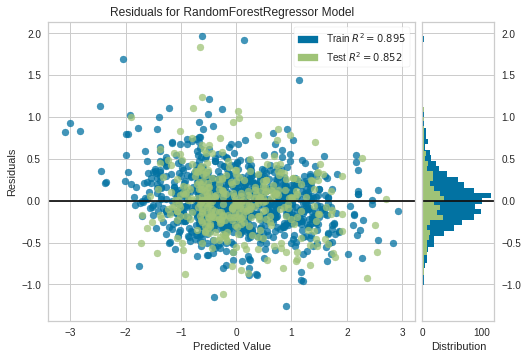

In [0]:
X2 = pd.get_dummies(X.copy())
X_train, X_test, y_train, y_test = train_test_split(X2, y)
reg = RandomForestRegressor(max_depth=5)
viz = ResidualsPlot(reg)
viz.fit(pd.get_dummies(X_train), y_train)
viz.score(pd.get_dummies(X_test), y_test)
viz.poof()

In [0]:
from sklearn.decomposition import PCA